In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
path = "sales_data.csv"

In [3]:
# Quick look at the data
data = pd.read_csv(path) 

In [7]:
print(f"5 rows of dataset dataset")
print(data.head()) # look 5 rows in csv file read
print("\n")
print(f"Information Overview of dataset")
print(data.info()) # Overview of dataset like number of rows and columns, columns name, Data types of each column for example (int, float, object, etc), number of non-null values per column, memory usage
print("\n")
print(f"Description Overview of dataset\n")
print(data.describe()) # summary stats for numberic columns for example count(bnumber of value), Mean(), Min and max values
print("\n")  
  # explaning about results which return from describe() function
    # count: Number of non-null values in the comlumn (in this case, 200 rows) -> you can know about your dataset have how much row can null.
    # mean: Avarage value = sum / count: give you athe average equal sum / count
    # min: Smallest value in column
    # 25%: meaning around 25% values less than or equal this
    # 50%: ...
    # 75%: ...
    # max: ...


5 rows of dataset dataset
         Date     Product  Quantity  Price           City
0  2025-01-01      Laptop         2    100    Los Angeles
1  2025-01-01       Mouse         1    800        Chicago
2  2025-01-01  Smartphone         2   1000  San Francisco
3  2025-01-01  Headphones         4    300      San Diego
4  2025-01-01       Mouse         4    200  San Francisco


Information Overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      200 non-null    object
 1   Product   200 non-null    object
 2   Quantity  200 non-null    int64 
 3   Price     200 non-null    int64 
 4   City      200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB
None


Description Overview of dataset

         Quantity        Price
count  200.000000   200.000000
mean     2.510000   477.000000
std      1.107262   310.245486
min     

In [9]:
# check if any column has missing (null) values
print(f"check if any column has missing (null) values")
print(data.isnull().sum())
  # if all are 0, your data are good
  # else, you may want to drop or fill them so Can you use code below
#data.dropna(inplace=True) # This is line code for python, Not comment


check if any column has missing (null) values
Date        0
Product     0
Quantity    0
Price       0
City        0
dtype: int64


In [10]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Confirm change
print(data.dtypes)

Date        datetime64[ns]
Product             object
Quantity             int64
Price                int64
City                object
dtype: object


In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

# Remove duplicates if found
data.drop_duplicates(inplace=True)

2
0


In [16]:
# Total Revenue
data['Total'] = data['Quantity'] * data['Price']


# Total revenue
total_revenue = data['Total'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $246,800.00


In [ ]:
# Revenue by product
product_revenue = data.groupby('Product')['Total'].sum().sort_values(ascending=False)
print(product_revenue)

Product
Monitor       47600
Headphones    46900
Mouse         39300
Laptop        33000
Keyboard      32500
Smartphone    26100
Tablet        21400
Name: Total, dtype: int64


<Axes: title={'center': 'Revenue by Product'}, xlabel='Product'>

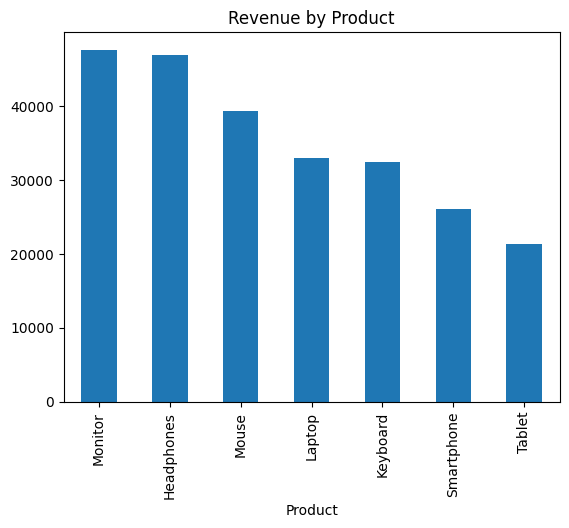

In [21]:
product_revenue.plot(kind='bar', title='Revenue by Product')

In [22]:
city_revenue = data.groupby('City')['Total'].sum().sort_values(ascending=False)
print(city_revenue)

City
San Diego        70600
San Francisco    47000
Los Angeles      45500
New York         42700
Chicago          41000
Name: Total, dtype: int64


<Axes: title={'center': 'Revenue by City'}, ylabel='City'>

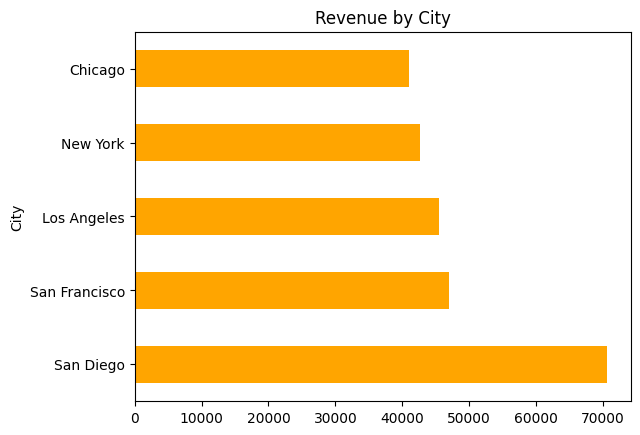

In [25]:
city_revenue.plot(kind='barh', title='Revenue by City', color='orange')

In [26]:
most_sold = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print(most_sold)

Product
Monitor       104
Laptop         94
Headphones     83
Mouse          72
Keyboard       50
Tablet         47
Smartphone     45
Name: Quantity, dtype: int64


<Axes: title={'center': 'Quantity sold'}, ylabel='Product'>

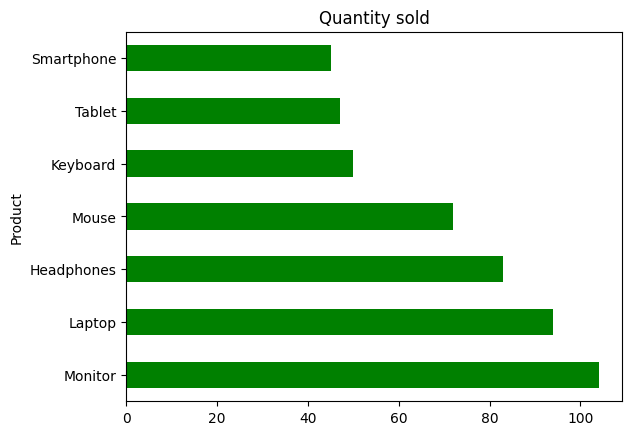

In [28]:
most_sold.plot(kind='barh', title='Quantity sold', color='green')

In [29]:
# Best Sales Date
daily_revenue = data.groupby('Date')['Total'].sum().sort_values(ascending=False)

print(daily_revenue)

Date
2025-01-15    15200
2025-01-26    15100
2025-01-07    14500
2025-01-21    13000
2025-01-08    12400
2025-01-01    12200
2025-01-28    11900
2025-01-23    11900
2025-01-03    11000
2025-01-12    10500
2025-01-24    10500
2025-01-22    10200
2025-01-18     9400
2025-01-11     9100
2025-01-02     8300
2025-01-27     6900
2025-01-20     6900
2025-01-25     5900
2025-01-31     5000
2025-01-29     4800
2025-01-14     4700
2025-01-13     4500
2025-01-04     4500
2025-01-30     4000
2025-01-06     4000
2025-01-05     3900
2025-01-19     3800
2025-01-10     3500
2025-01-17     3400
2025-01-09     3300
2025-01-16     2500
Name: Total, dtype: int64


<Axes: title={'center': 'Daily Sales Revenue'}, xlabel='Date'>

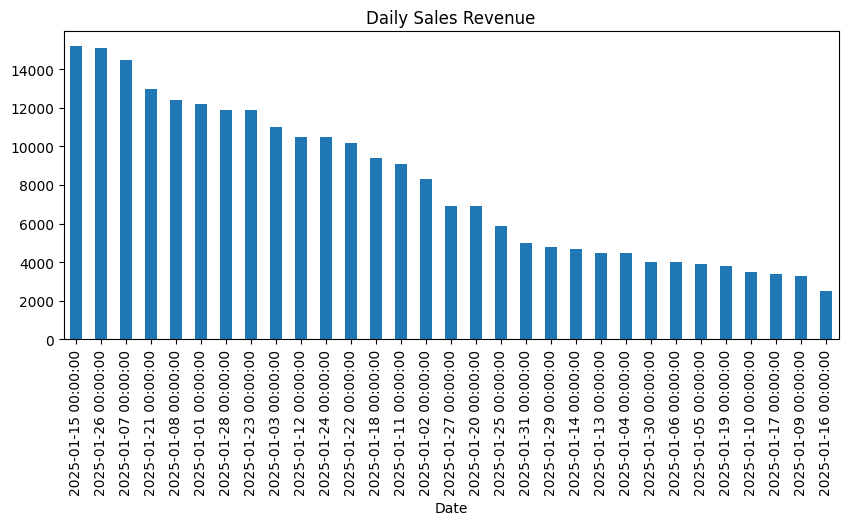

In [37]:
daily_revenue.plot(kind='bar', title='Daily Sales Revenue', figsize=(10,4))

In [38]:
print(data['Total'])

0       200
1       800
2      2000
3      1200
4       800
       ... 
195     400
196    2400
197     300
198    1200
199     300
Name: Total, Length: 198, dtype: int64


In [ ]:
# Data Visualize

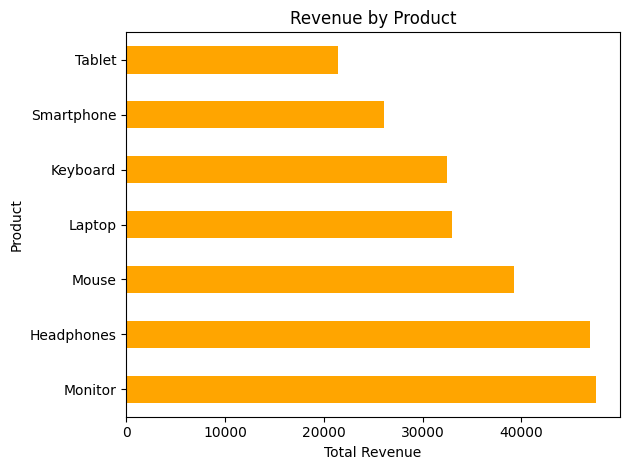

In [40]:
# Plot Revenue By Product
product_revenue = data.groupby('Product')['Total'].sum().sort_values(ascending=False)
product_revenue.plot(kind='barh', title='Revenue by Product', color='orange')

plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

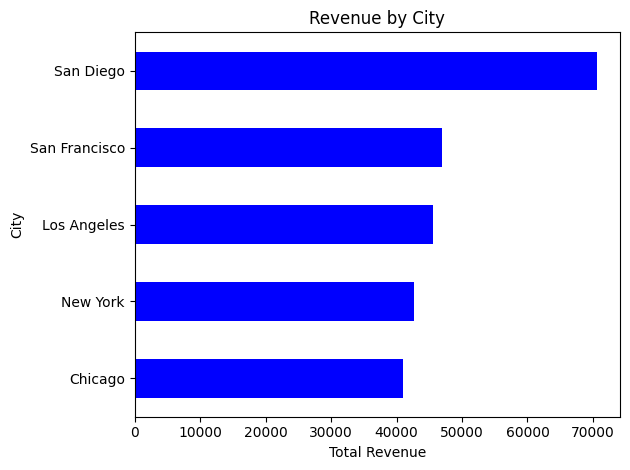

In [44]:
# Plot Revenue by City
city_revenue = data.groupby('City')['Total'].sum().sort_values()

city_revenue.plot(kind='barh', title='Revenue by City', color='blue')


plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()

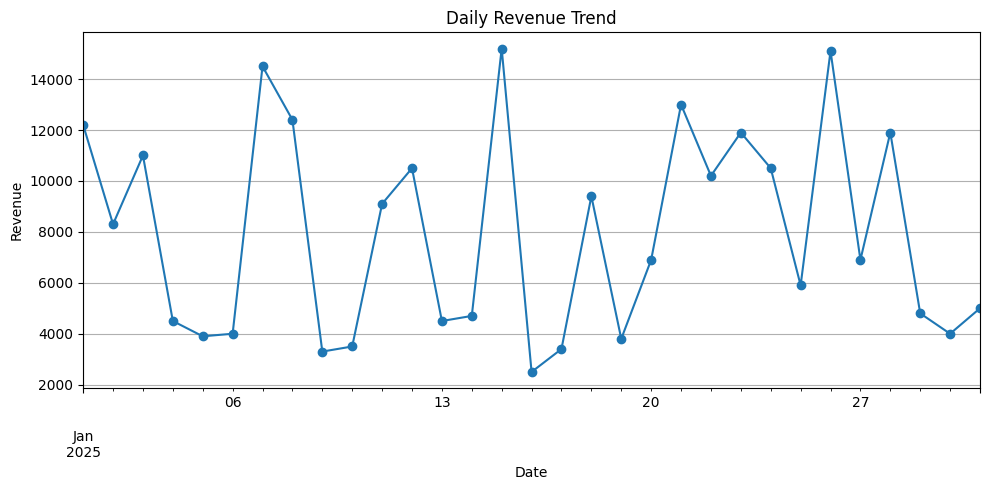

In [48]:
daily_revenue = data.groupby('Date')['Total'].sum()
daily_revenue.plot(title='Daily Revenue Trend', marker='o', figsize=(10,5))

plt.ylabel('Revenue')
#plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


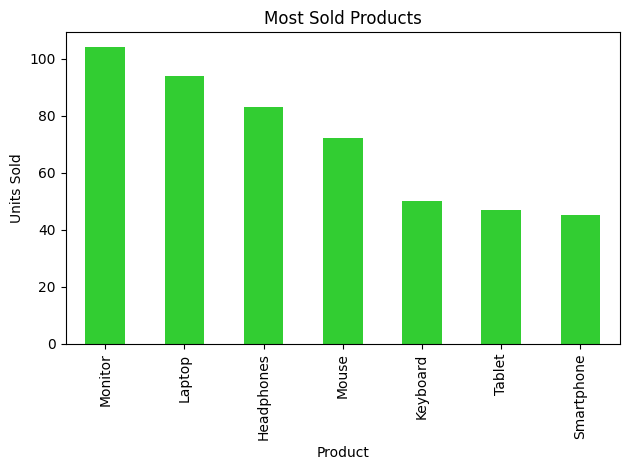

In [47]:
top_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

top_quantity.plot(kind='bar', title='Most Sold Products', color='limegreen')

plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


In [49]:
# Export CSV file
product_revenue = data.groupby('Product')['Total'].sum().reset_index()

# Save to CSV new file
product_revenue.to_csv('product_revenue.csv', index=False)

In [50]:
# Export to Excel
product_revenue.to_excel('product_revenue.xlsx', index=False)


In [ ]:
# Or you can use export the different way for multiple DataFrames to one excel 
with pd.ExcelWriter('sales_analysis.xlsx') as writer:
  product_revenue.to_excel(writer, sheet_name='Revenue_by_product', index=False)
  data.to_excel(writer, sheet_name='Raw_Data', index=False)

<Figure size 1000x500 with 0 Axes>

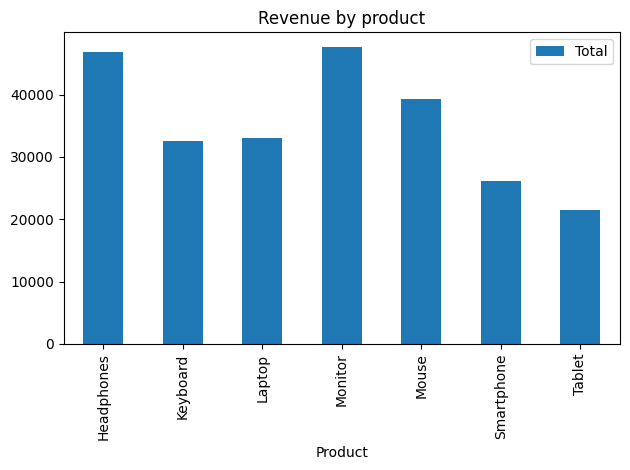

In [52]:
# Optional: Save Visualizations (Charts) as Images
plt.figure(figsize=(10, 5))
product_revenue.set_index('Product').plot(kind='bar')
plt.title('Revenue by product')
plt.tight_layout()
plt.savefig('revenue_by_product.png')

**Colabrate SQL with python**

In [53]:
%pip install pyodbc
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------- ----- 1.8/2.1 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 16.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc
from sqlalchemy import create_engine

In [6]:
# Create connection string
# Connect python to database
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=ANHTU;'  # or just SERVER=YourSQLServerName
    'DATABASE=quanLyThamGiaDeTai;'
    'Trusted_Connection=yes;'        # If using Windows Authentication
    'Encrypt=no;' # Use this if encryption causes issues
)

In [13]:
result_query = "select* from giaovien"

df = pd.read_sql(result_query, conn)

print(df.head())

  magv            hoten   luong phai    ngaysinh  \
0  001   Nguyễn Hoài An  2000.0  Nam  1973-02-15   
1  002   Trần Trà Hương  2500.0   Nữ  1960-06-20   
2  003  Nguyễn Ngọc Ánh  2200.0   Nữ  1975-05-11   
3  004   Trương Nam Sơn  2300.0  Nam  1959-06-20   
4  005      Lý Hoàng Hà  2500.0  Nam  1954-10-23   

                                 diachi gvqlcm  mabm  
0      25/3 L?c Long Quân, Q.10, TP HCM   None   MMT  
1        125 Trần Hưng Đạo, Q.1, TP HCM   None  HTTT  
2     12/21 Võ Văn Ngân Thủ Đức, TP HCM    002  HTTT  
3       215 Lý Thường Kiệt, TP Biên Hòa   None    VS  
4  22/5 Nguyễn Xí, Q.Bình Thạnh, TP HCM   None  VLDT  


C:\Users\hp\AppData\Local\Temp\ipykernel_7812\280470428.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(result_query, conn)


In [14]:
# Export to Excel
df.to_excel('teacher.xlsx', index=False)

In [32]:
import sqlalchemy as sa
from sqlalchemy import text


In [33]:
connection_url = sa.engine.URL.create(
    "mssql+pyodbc",
    host="ANHTU",
    database="quanLyThamGiaDeTai",
    query={"driver": "ODBC Driver 18 for SQL Server", "TrustServerCertificate": "yes"}
)

# check
print(connection_url)

mssql+pyodbc://ANHTU/quanLyThamGiaDeTai?TrustServerCertificate=yes&driver=ODBC+Driver+18+for+SQL+Server


In [34]:
engine = sa.create_engine(connection_url)

In [39]:
df = pd.read_sql(text("select* from giaovien"), engine)

In [37]:
print(df)

   magv            hoten   luong phai    ngaysinh  \
0   001   Nguyễn Hoài An  2000.0  Nam  1973-02-15   
1   002   Trần Trà Hương  2500.0   Nữ  1960-06-20   
2   003  Nguyễn Ngọc Ánh  2200.0   Nữ  1975-05-11   
3   004   Trương Nam Sơn  2300.0  Nam  1959-06-20   
4   005      Lý Hoàng Hà  2500.0  Nam  1954-10-23   
5   006  Trần Bạch Tuyết  1500.0   Nữ  1980-05-20   
6   007  Nguyễn An Trung  2100.0  Nam  1976-06-05   
7   008  Trần Trung Hiếu  1800.0  Nam  1977-08-06   
8   009   Trần Hoàng Nam  2000.0  Nam  1975-11-22   
9   010   Phạm Nam Thanh  1500.0  Nam  1980-12-12   
10  020    Luong van L?o  3000.0  Gay  1980-03-04   

                                  diachi gvqlcm  mabm  
0       25/3 L?c Long Quân, Q.10, TP HCM   None   MMT  
1         125 Trần Hưng Đạo, Q.1, TP HCM   None  HTTT  
2      12/21 Võ Văn Ngân Thủ Đức, TP HCM    002  HTTT  
3        215 Lý Thường Kiệt, TP Biên Hòa   None    VS  
4   22/5 Nguyễn Xí, Q.Bình Thạnh, TP HCM   None  VLDT  
5              127 Hùng Vươ

In [40]:
data = pd.DataFrame(df)

data.to_excel('output.xlsx', index=False)